# SpaceX Launch Analysis & Prediction Platform

This notebook implements a comprehensive analysis and prediction platform for SpaceX launches. It includes data loading, preprocessing, exploratory data analysis (EDA), machine learning modeling, and an interactive dashboard using Dash.

## Objective
Develop an advanced Python application to visualize SpaceX launch data and predict launch success using machine learning.

## Learning Outcomes
- Understand RESTful APIs and data extraction.
- Enhance data cleaning, preprocessing, and feature engineering skills.
- Apply machine learning for classification.
- Create interactive dashboards with Dash.
- Implement geospatial visualizations with Folium.

## 1. Data Acquisition & Preprocessing

We will load the provided SpaceX launch data, clean it, and preprocess it for analysis and modeling. Note: Weather data scraping is mentioned in the requirements, but since we don't have access to external APIs in this context, we'll include a placeholder for it.

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [7]:
# Load the data
df = pd.read_csv('spacex_launches.csv')

df.head(5)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,NaN,NaN,[],[],NaN,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,NaN,NaN,[],[],NaN,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,NaN,NaN,[],[],NaN,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,NaN,NaN,[],[],NaN,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],NaN,[],[],...,NaN,NaN,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   static_fire_date_utc       121 non-null    object 
 1   static_fire_date_unix      121 non-null    float64
 2   net                        205 non-null    bool   
 3   window                     117 non-null    float64
 4   rocket                     205 non-null    object 
 5   success                    186 non-null    object 
 6   failures                   205 non-null    object 
 7   details                    134 non-null    object 
 8   crew                       205 non-null    object 
 9   ships                      205 non-null    object 
 10  capsules                   205 non-null    object 
 11  payloads                   205 non-null    object 
 12  launchpad                  205 non-null    object 
 13  flight_number              205 non-null    int64  

In [9]:
# Placeholder for weather data (to be implemented with OpenWeatherMap API if available)
def fetch_weather_data(date, location):
    # Placeholder: In a real scenario, use OpenWeatherMap API to fetch weather data for the launch date and site
    # For now, return dummy weather data
    return {'temperature': np.nan, 'wind_speed': np.nan, 'precipitation': np.nan}


In [10]:
# Data Cleaning
# Handle missing values
df['static_fire_date_utc'].fillna('Unknown', inplace=True)
df['window'].fillna(df['window'].median(), inplace=True)
df['details'].fillna('No details', inplace=True)

In [11]:
# Convert date columns to datetime
df['date_utc'] = pd.to_datetime(df['date_utc'], errors='coerce')
df['year'] = df['date_utc'].dt.year

In [12]:
# Encode categorical variables
le_rocket = LabelEncoder()
le_launchpad = LabelEncoder()
df['rocket_encoded'] = le_rocket.fit_transform(df['rocket'])
df['launchpad_encoded'] = le_launchpad.fit_transform(df['launchpad'])


In [13]:
# Handle upcoming launches (remove them as they lack success data)
df = df[df['upcoming'] == False]

In [14]:
# Drop rows with missing success values
df = df.dropna(subset=['success'])

In [15]:
# Convert success to binary (True=1, False=0)
df['success'] = df['success'].astype(int)

# Display cleaned data
print(df[['rocket_encoded', 'launchpad_encoded', 'success', 'year']].head())

   rocket_encoded  launchpad_encoded  success  year
0               0                  3        0  2006
1               0                  3        0  2007
2               0                  3        0  2008
3               0                  3        1  2008
4               0                  3        1  2009


## 2. Exploratory Data Analysis (EDA)

We will analyze factors influencing launch success, such as rocket type, launch site, and year. Visualizations will help identify trends and correlations.

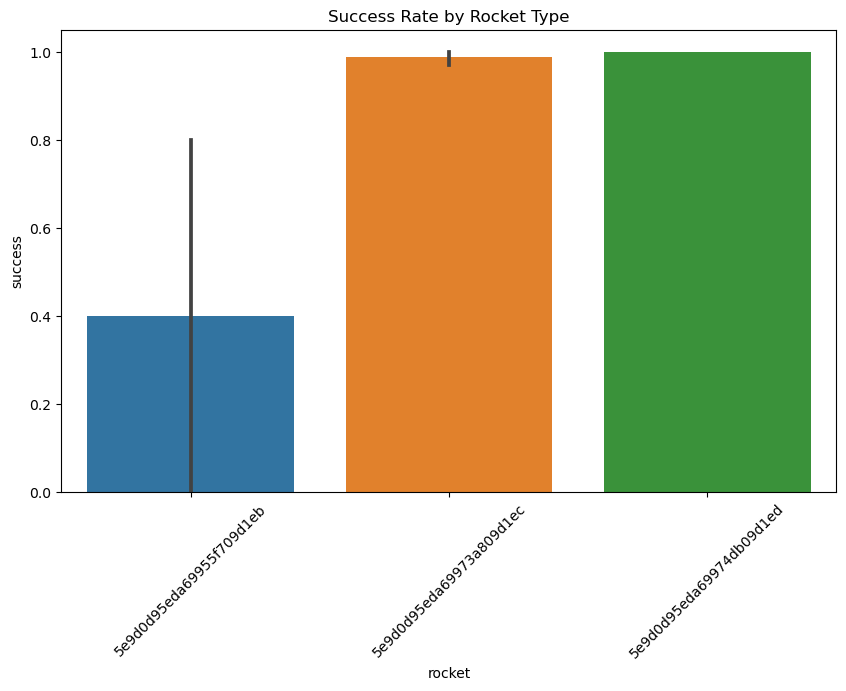

In [16]:
# Success rate by rocket type
plt.figure(figsize=(10, 6))
sns.barplot(x='rocket', y='success', data=df)
plt.title('Success Rate by Rocket Type')
plt.xticks(rotation=45)
plt.savefig('success_by_rocket.png')
plt.show()

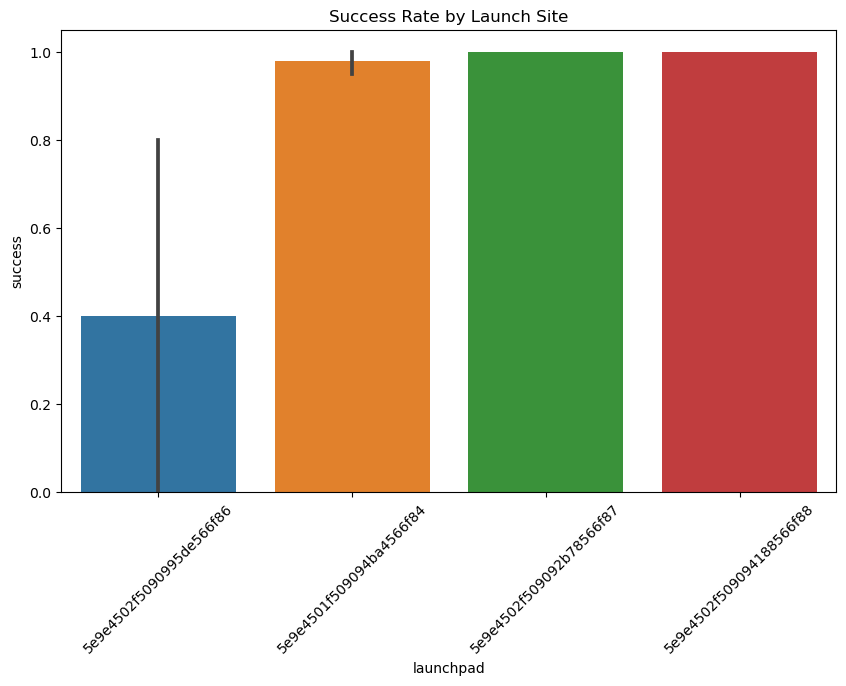

In [17]:
# Success rate by launch site
plt.figure(figsize=(10, 6))
sns.barplot(x='launchpad', y='success', data=df)
plt.title('Success Rate by Launch Site')
plt.xticks(rotation=45)
plt.savefig('success_by_launchpad.png')
plt.show()

C:\Users\Ntech\AppData\Local\Temp\ipykernel_14164\1222909986.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x='year', y='success', data=df.groupby('year').mean().reset_index())


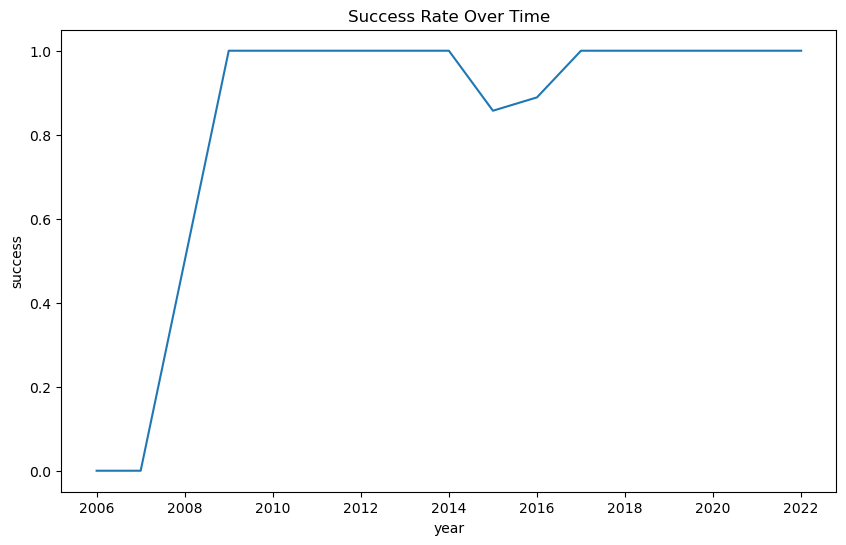

In [18]:
# Success rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='success', data=df.groupby('year').mean().reset_index())
plt.title('Success Rate Over Time')
plt.savefig('success_over_time.png')
plt.show()

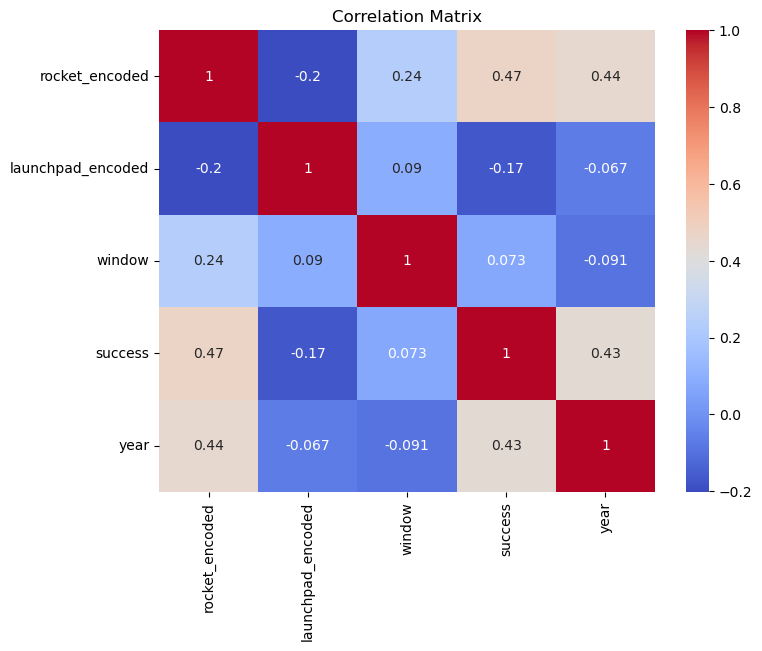

In [19]:
# Correlation matrix
corr = df[['rocket_encoded', 'launchpad_encoded', 'window', 'success', 'year']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

In [20]:
# Geospatial visualization of launch sites
launch_sites = {
    '5e9e4502f5090995de566f86': {'name': 'Kwajalein Atoll', 'coords': [9.047, 167.743]},
    '5e9e4501f509094ba4566f84': {'name': 'Cape Canaveral SLC-40', 'coords': [28.562, -80.577]},
    '5e9e4502f509092b78566f87': {'name': 'Vandenberg SLC-4E', 'coords': [34.632, -120.611]},
    '5e9e4502f509094188566f88': {'name': 'Kennedy Space Center LC-39A', 'coords': [28.608, -80.604]}
}

m = folium.Map(location=[0, 0], zoom_start=2)
for site_id, info in launch_sites.items():
    site_data = df[df['launchpad'] == site_id]
    success_rate = site_data['success'].mean()
    folium.Marker(
        location=info['coords'],
        popup=f"{info['name']}<br>Success Rate: {success_rate:.2%}",
        icon=folium.Icon(color='blue' if success_rate > 0.8 else 'red')
    ).add_to(m)
m.save('launch_sites_map.html')

## 3. Machine Learning Model

We will build a Random Forest Classifier to predict launch success based on features like rocket type, launch site, and year.

In [21]:
# Prepare features and target
features = ['rocket_encoded', 'launchpad_encoded', 'window', 'year']
X = df[features]
y = df['success']

In [22]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Predictions
y_pred = rf_model.predict(X_test)


In [25]:
# Evaluate model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [26]:
# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Average CV Score:', cv_scores.mean())


Cross-Validation Scores: [0.23684211 1.         0.97297297 0.97297297 0.97297297]
Average CV Score: 0.8311522048364154


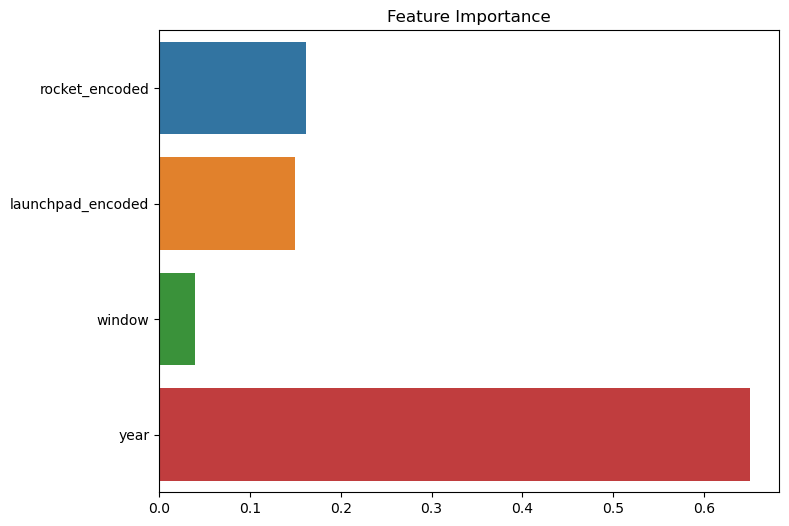

In [27]:
# Feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=rf_model.feature_importances_, y=features)
plt.title('Feature Importance')
plt.savefig('feature_importance.png')
plt.show()

## 4. Interactive Dashboard

We will create an interactive dashboard using Dash to display historical data, geospatial visualizations, and a predictive tool.

In [30]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px


In [34]:
# Initialize Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1('SpaceX Launch Analysis & Prediction Platform'),
    
    # Filters
    html.Label('Select Year:'),
    dcc.Dropdown(
        id='year-filter',
        options=[{'label': str(year), 'value': year} for year in sorted(df['year'].unique())],
        value=df['year'].max(),
        multi=False
    ),
    
    html.Label('Select Launch Site:'),
    dcc.Dropdown(
        id='launchpad-filter',
        options=[{'label': launch_sites[site]['name'], 'value': site} for site in launch_sites],
        value=list(launch_sites.keys())[0],
        multi=False
    ),
    
    # Visualizations
    dcc.Graph(id='success-by-rocket'),
    dcc.Graph(id='success-over-time'),
    
    # Geospatial map
    html.Iframe(srcDoc=open('launch_sites_map.html', 'r').read(), width='100%', height='500'),
    
    # Predictive tool
    html.H2('Predict Launch Success'),
    html.Label('Rocket Type:'),
    dcc.Dropdown(
        id='rocket-input',
        options=[{'label': rocket, 'value': idx} for idx, rocket in enumerate(le_rocket.classes_)],
        value=0
    ),
    html.Label('Launch Site:'),
    dcc.Dropdown(
        id='launchpad-input',
        options=[{'label': launch_sites[site]['name'], 'value': idx} for idx, site in enumerate(le_launchpad.classes_)],
        value=0
    ),
    html.Label('Launch Window (seconds):'),
    dcc.Input(id='window-input', type='number', value=0),
    html.Label('Year:'),
    dcc.Input(id='year-input', type='number', value=2022),
    html.Button('Predict', id='predict-button', n_clicks=0),
    html.Div(id='prediction-output')
])

# Callbacks for interactive visualizations
@app.callback(
    Output('success-by-rocket', 'figure'),
    [Input('year-filter', 'value'), Input('launchpad-filter', 'value')]
)
def update_rocket_success(year, launchpad):
    filtered_df = df[(df['year'] == year) & (df['launchpad'] == launchpad)]
    fig = px.bar(filtered_df, x='rocket', y='success', title='Success Rate by Rocket Type')
    return fig

@app.callback(
    Output('success-over-time', 'figure'),
    [Input('launchpad-filter', 'value')]
)
def update_time_success(launchpad):
    filtered_df = df[df['launchpad'] == launchpad]
    fig = px.line(filtered_df.groupby('year').mean().reset_index(), x='year', y='success', title='Success Rate Over Time')
    return fig

@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')],
    [Input('rocket-input', 'value'), Input('launchpad-input', 'value'), Input('window-input', 'value'), Input('year-input', 'value')]
)
def predict_success(n_clicks, rocket, launchpad, window, year):
    if n_clicks > 0:
        input_data = pd.DataFrame([[rocket, launchpad, window, year]], columns=['rocket_encoded', 'launchpad_encoded', 'window', 'year'])
        prob = rf_model.predict_proba(input_data)[0][1]
        return f'Launch Success Probability: {prob:.2%}'
    return ''

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

C:\Users\Ntech\AppData\Local\Temp\ipykernel_14164\3411993067.py:70: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## 5. Deployment Notes

To deploy this application, you can use a platform like Heroku or Render. Save the above code as `app.py` and follow the platform-specific deployment instructions. Ensure all required libraries are listed in a `requirements.txt` file:

```
pandas
numpy
matplotlib
seaborn
folium
scikit-learn
dash
plotly
```

For Heroku, use the following commands:
```bash
heroku create
git push heroku main
```

Ensure the `Procfile` contains:
```
web: python app.py
```